In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

In [3]:
df = pd.read_csv('sp500_tickers_full_info.csv')


In [6]:
df.columns

Index(['address1', 'city', 'state', 'zip', 'country', 'phone', 'website',
       'industry', 'industryKey', 'industryDisp',
       ...
       'ebitdaMargins', 'operatingMargins', 'financialCurrency',
       'trailingPegRatio', 'Ticker', 'address2', 'earningsQuarterlyGrowth',
       'earningsGrowth', 'fax', 'industrySymbol'],
      dtype='object', length=136)

In [8]:
ticker_list = df['Ticker'].tolist()

In [10]:
ticker_list 

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMTM',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',

In [11]:
close_prices_df = pd.DataFrame()

In [12]:
for ticker in ticker_list:
    try:
        stock = yf.Ticker(ticker)
        history = stock.history(period='1y')  # Fetch data for the last year
        history['Ticker'] = ticker  # Add a column for the ticker symbol
        close_prices_df = pd.concat([close_prices_df, history[['Ticker', 'Close']]], axis=0)
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

AMTM: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', 'ytd', 'max']
$BRK.B: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BF.B: possibly delisted; no price data found  (period=1y)
$CTLT: possibly delisted; no price data found  (period=1y)
SW: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', 'ytd', 'max']


In [14]:
close_prices_df.reset_index(inplace=True)

In [16]:
close_prices_df

,Date,Ticker,Close
0,2023-11-06 00:00:00-05:00,MMM,74.799248
1,2023-11-07 00:00:00-05:00,MMM,74.503311
2,2023-11-08 00:00:00-05:00,MMM,73.839462
3,2023-11-09 00:00:00-05:00,MMM,73.343575
4,2023-11-10 00:00:00-05:00,MMM,74.231377
...,...,...,...
124795,2024-10-29 00:00:00-04:00,ZTS,180.841476
124796,2024-10-30 00:00:00-04:00,ZTS,182.307999
124797,2024-10-31 00:00:00-04:00,ZTS,178.779999
124798,2024-11-01 00:00:00-04:00,ZTS,181.949997


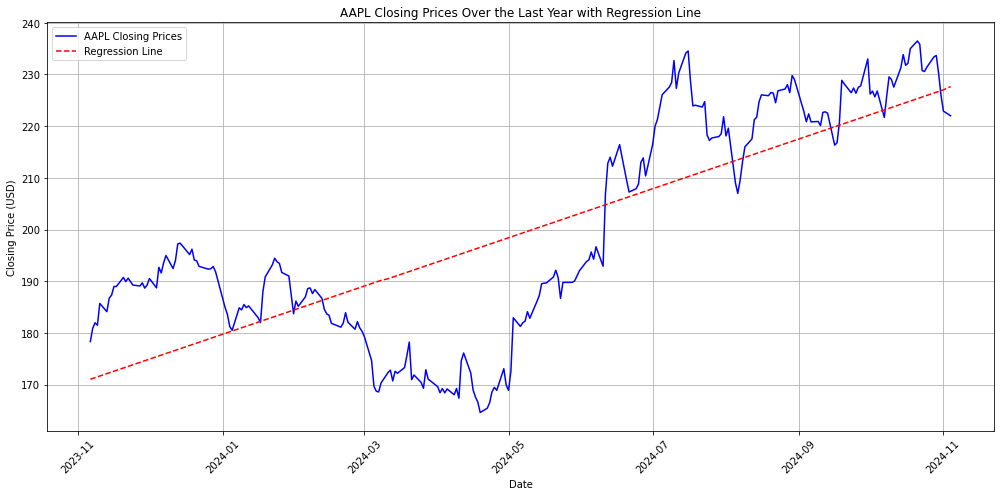

In [21]:
import matplotlib.pyplot as plt
# Function to plot the closing prices and a regression line for a given company
def plot_closing_prices_with_regression(ticker, close_prices_df):
    # Filter the DataFrame for the given ticker
    company_df = close_prices_df[close_prices_df['Ticker'] == ticker].copy()  # Use .copy() to avoid the warning

    # Check if data exists for the ticker
    if company_df.empty:
        print(f"No data found for {ticker}")
        return

    # Convert 'Date' to a numerical format for regression using .loc[]
    company_df.loc[:, 'DateNumeric'] = (company_df['Date'] - company_df['Date'].min()).dt.days

    # Compute the linear regression line
    x = company_df['DateNumeric']
    y = company_df['Close']
    coefficients = np.polyfit(x, y, 1)  # Linear regression (degree 1)
    regression_line = np.polyval(coefficients, x)

    # Plot the closing prices
    plt.figure(figsize=(14, 7))
    plt.plot(company_df['Date'], company_df['Close'], label=f'{ticker} Closing Prices', color='blue')
    plt.plot(company_df['Date'], regression_line, label='Regression Line', color='red', linestyle='--')
    plt.title(f'{ticker} Closing Prices Over the Last Year with Regression Line')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
    plt.tight_layout()
    plt.show()

# Example usage:
plot_closing_prices_with_regression('AAPL', close_prices_df)


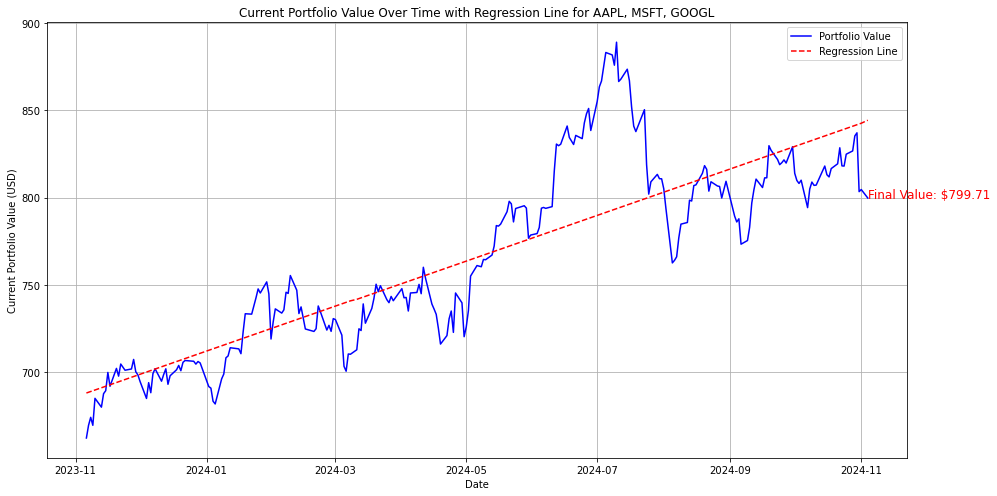

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate and plot the portfolio value with a regression line given a list of tickers
def calculate_and_plot_portfolio_value_with_regression(ticker_list, close_prices_df):
    # Filter the DataFrame for the tickers in the list
    portfolio_df = close_prices_df[close_prices_df['Ticker'].isin(ticker_list)].copy()

    # Pivot the DataFrame to have tickers as columns and dates as rows
    pivot_df = portfolio_df.pivot(index='Date', columns='Ticker', values='Close')

    # Calculate the total portfolio value as the sum of close prices for each day
    portfolio_value = pivot_df.sum(axis=1)

    # Convert 'Date' to a numerical format for regression
    date_numeric = (portfolio_value.index - portfolio_value.index.min()).days

    # Compute the linear regression line
    coefficients = np.polyfit(date_numeric, portfolio_value, 1)  # Linear regression (degree 1)
    regression_line = np.polyval(coefficients, date_numeric)

    # Plot the portfolio value over time
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_value.index, portfolio_value, label='Portfolio Value', color='blue')
    plt.plot(portfolio_value.index, regression_line, label='Regression Line', color='red', linestyle='--')
    plt.title(f'Current Portfolio Value Over Time with Regression Line for {", ".join(ticker_list)}')
    plt.xlabel('Date')
    plt.ylabel('Current Portfolio Value (USD)')
    plt.grid(True)
    plt.legend()

    # Show the final value as text on the plot
    plt.text(portfolio_value.index[-1], portfolio_value.iloc[-1],
             f'Final Value: ${portfolio_value.iloc[-1]:.2f}', fontsize=12, color='red')

    plt.tight_layout()
    plt.show()

    return portfolio_value

# Example usage:
ticker_list = ['AAPL', 'MSFT', 'GOOGL']  # Replace with your list of tickers
portfolio_value = calculate_and_plot_portfolio_value_with_regression(ticker_list, close_prices_df)


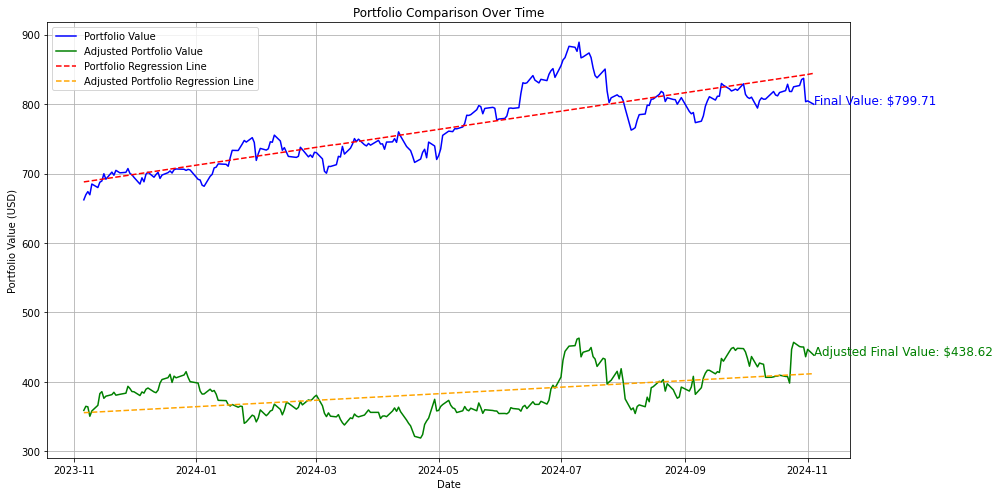

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate and plot the portfolio values for two portfolios with regression lines
def plot_two_portfolios_with_regression(portfolio_list, adjusted_portfolio_list, close_prices_df):
    # Function to calculate the portfolio value
    def calculate_portfolio_value(ticker_list, close_prices_df):
        portfolio_df = close_prices_df[close_prices_df['Ticker'].isin(ticker_list)].copy()
        pivot_df = portfolio_df.pivot(index='Date', columns='Ticker', values='Close')
        portfolio_value = pivot_df.sum(axis=1)
        return portfolio_value

    # Calculate portfolio values for both portfolios
    portfolio_value = calculate_portfolio_value(portfolio_list, close_prices_df)
    adjusted_portfolio_value = calculate_portfolio_value(adjusted_portfolio_list, close_prices_df)

    # Plot the portfolio values
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_value.index, portfolio_value, label='Portfolio Value', color='blue')
    plt.plot(adjusted_portfolio_value.index, adjusted_portfolio_value, label='Adjusted Portfolio Value', color='green')

    # Add regression lines for both portfolios
    date_numeric = (portfolio_value.index - portfolio_value.index.min()).days
    coefficients = np.polyfit(date_numeric, portfolio_value, 1)
    regression_line = np.polyval(coefficients, date_numeric)
    plt.plot(portfolio_value.index, regression_line, label='Portfolio Regression Line', color='red', linestyle='--')

    adjusted_date_numeric = (adjusted_portfolio_value.index - adjusted_portfolio_value.index.min()).days
    adjusted_coefficients = np.polyfit(adjusted_date_numeric, adjusted_portfolio_value, 1)
    adjusted_regression_line = np.polyval(adjusted_coefficients, adjusted_date_numeric)
    plt.plot(adjusted_portfolio_value.index, adjusted_regression_line, label='Adjusted Portfolio Regression Line', color='orange', linestyle='--')

    # Plot formatting
    plt.title(f'Portfolio Comparison Over Time')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value (USD)')
    plt.grid(True)
    plt.legend()

    # Show the final value as text on the plot
    plt.text(portfolio_value.index[-1], portfolio_value.iloc[-1],
             f'Final Value: ${portfolio_value.iloc[-1]:.2f}', fontsize=12, color='blue')
    plt.text(adjusted_portfolio_value.index[-1], adjusted_portfolio_value.iloc[-1],
             f'Adjusted Final Value: ${adjusted_portfolio_value.iloc[-1]:.2f}', fontsize=12, color='green')

    plt.tight_layout()
    plt.show()

# Example usage:
portfolio_list = ['AAPL', 'MSFT', 'GOOGL']  # Replace with your portfolio tickers
adjusted_portfolio_list = ['AMZN', 'TSLA', 'FB']  # Replace with your adjusted portfolio tickers
plot_two_portfolios_with_regression(portfolio_list, adjusted_portfolio_list, close_prices_df)
